# 特殊函数

## 大数定律与中心极限定理

**切比雪夫不等式**：

设随机变量X的数学期望和方差存在，分别记为$\mu$,$\sigma^2$，则对任意的$\varepsilon>0$​, 有
	
$$
P\{|X-\mu|\ge \varepsilon\}\le\frac{\sigma^2}{\varepsilon^2}
$$

**辛钦大数定律：**

设$\{X_i,i\ge1\}$​为独立同分布的随机变量序列，且数学期望存在，记为$\mu$​，则对任意的$\varepsilon>0$​，有
	
$$
\lim\limits_{n\rightarrow+\infty}P\{|\frac{1}{n}\sum\limits_{i=1}^nX_i-\mu|\ge\varepsilon\}=0
$$

**辛钦大数定律推论：**

设$\{X_i,i>=1\}$为独立同分布的随机变量序列，若$h(x)$为一连续函数，且$E(h(X_i))<+\infty$，则对任意的$\varepsilon>0$,有
	
$$
\lim\limits_{n\rightarrow+\infty}P\{|\frac{1}{n}\sum\limits_{i=1}^nh(X_i)-a|\ge\varepsilon\}=0	
$$

其中$a=E(h(X_i))$

大数定理
- 平均值收敛于期望值
- 频率收敛于概率

中心极限定理
任意同分布的随机变量$X_i$之和，符合正态分布

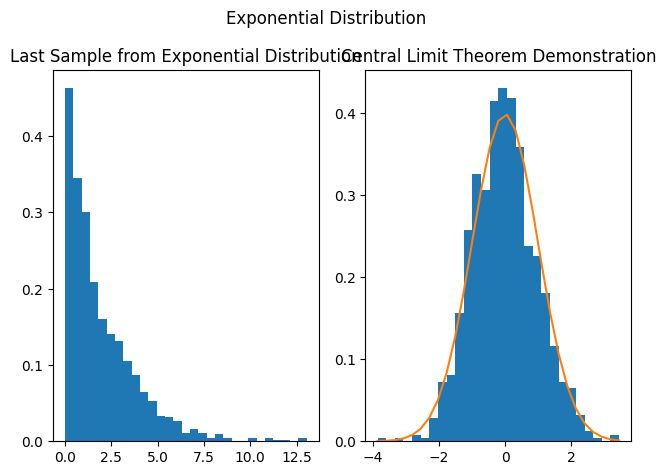

In [ ]:
# -*- coding: utf-8 -*-
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

alambda=2.
fig,ax = plt.subplots(1,2)
yarr=[]
for n in range(50,1000):
    x=st.expon.rvs(0,alambda,size=n)
    y=(sum(x)-n*alambda)/(np.sqrt(n)*alambda)
    yarr.append(y)
ax[0].hist(x,density=True,bins='auto')
ax[0].set_title('Last Sample from Exponential Distribution')
bins = np.histogram_bin_edges(yarr, bins='auto')
ax[1].hist(yarr,bins=bins,density=True)
ax[1].plot(bins,st.norm.pdf(bins))
ax[1].set_title('Central Limit Theorem Demonstration')
fig.suptitle('Central Limit Theorem with Exponential Distribution')
plt.tight_layout()

## 三大分布

需要满足 $X_1,X_2,\dots X_n$ 满足正态同分布

### （一）$\chi^2$分布：

$$
k_n(x) = \frac{1}{\Gamma(\frac{n}{2})2^{\frac{n}{2}}}e^{-x/2}x^{(n-2)/2}
$$

设$X_1,X_2,\ldots,X_n$为独立同分布的随机变量，且都服从标准正态分布$N(0,1)$

记：

$$
Y=X_1^2+X_2^2+\ldots+X_n^2
$$

则称$Y$服从自由度为n的$\chi^2$分布，记为$Y\sim\chi^2(n)$

**$\chi^2$ 分布的性质**

1. $\chi^2(2)=E(\frac{1}{2})$
2. 可加性：设$Y_1\sim\chi^2(m),Y_2\sim\chi^2(n)$，若两者相互独立，则$Y_1+Y_2\sim\chi^2(m+n)$
3. $E(\chi^2(m))=m$,$Var(\chi^2(m))=2m$
4. 上$\alpha$分位，可以查表


$$
\begin{equation}
(n-1)S^2/\sigma^2 = \sum_{i=1}^{n} (X_i-\bar{X})^2/\sigma^2 \propto \chi_{n-1}^2 
\end{equation}
$$

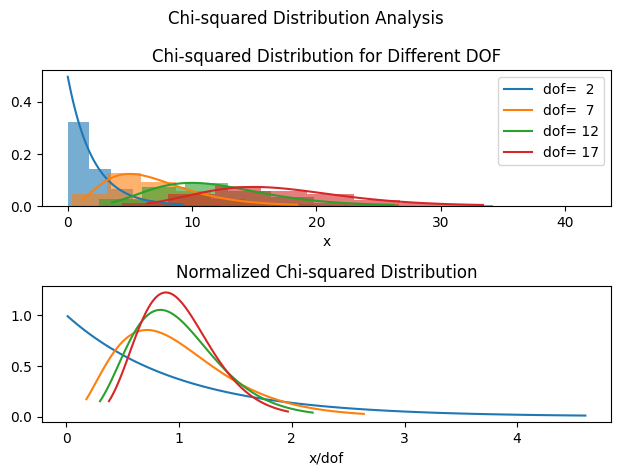

In [8]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

fig,ax = plt.subplots(2,1)

for df in range(2,20,5):
    x = np.linspace(st.chi2.ppf(0.01,df), st.chi2.ppf(0.99,df),100)
    p=ax[0].plot(x, st.chi2.pdf(x, df),
        label='dof={0:3d}'.format(df))
    k=sum(st.norm.rvs(size=[df,1000])**2) #正态随机变量x，生成df x 1000组，计算Y=df个元素的平方和
    ax[0].hist(k,density=True,alpha=0.6,color=p[0].get_color()) #1000组Y的分布
    ax[1].plot(x/df, st.chi2.pdf(x, df)*df,
        label='dof={0:3d}'.format(df)) #chi2/ndf
ax[0].legend()
ax[0].set_title('Chi-squared Distribution for Different DOF')
ax[1].set(xlabel='x/dof')
ax[1].set_title('Normalized Chi-squared Distribution')
ax[0].set(xlabel='x')
fig.suptitle('Chi-squared Distribution Analysis')
fig.tight_layout()

### （二）$t$分布：

设$X\sim N(0,1),Y\sim\chi^2(m)$，且$X,Y$相互独立

记：

$$
t=\frac{X}{\sqrt{Y/m}}
$$

则称$t$服从自由度为n的$t$分布，记为$t\sim t(n)$

**$t$分布的性质**

1. $f_t(x)=f_t(-x)$
2. $\lim\limits_{n\rightarrow+\infty}f_t(x)=\frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}$

$$
\begin{equation}
 \sqrt{n}(\bar{X}-\mu)/S \propto t_{n-1} 
\end{equation}
$$

t分布是一个厚尾分布，自由度较低的情况下，尾部要更厚一点


因为$S$中计算的是$x_i - \bar{x}$，进而丢失了一个自由度，所以ddof=1


```python
import scipy.stats as st
ndf=10
rv=st.t(ndf)
rv.interval(0.68) # 68置信区间
rv.interval(0.95) # 95置信区间
```

需要注意的是，上分位点记录的是$\alpha$,而累计分布函数是根据$1-\alpha$得来的

自由度为n的t分布的0.025分位点，$\Phi (x)=97.5\%$，记为 $t_n (0.025)$

In [9]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import scipy.stats as st

fig, ax = plt.subplots()

x = np.linspace(st.t.ppf(0.01, 5),
                st.t.ppf(0.99, 5), 100)
ax.plot(x,st.norm.pdf(x,0,1),'k+')
line, = ax.plot([]) 

def animate(df):

    line.set_data((x, st.t.pdf(x,df)))
    line.set_label("Degree of freedom={0:3d}".format(df))
    ax.legend()
    return line

anim = FuncAnimation(fig, animate, frames=20)
plt.show()
# anim.save('test.gif',fps=2,dpi=200)
from IPython.display import HTML
HTML(anim.to_jshtml())

<IPython.core.display.Javascript object>

### （三）$F$分布：

设$U\sim\chi^2(n_1),V\sim\chi^2(n_2)$，且$U,V$相互独立，则称随机变量

$$
F=\frac{U/n1}{V/n2}
$$

服从第一自由度为$n_1$，第二自由度为$n_2$的$F$分布，记为$F\sim F(n1,n2)$

**$F$分布有如下性质：**

1. 若$F\sim F(n1,n2)$，则$1/{F}\sim F(n2,n1)$	
2. 若$X\sim t(n)$，则$X^2\sim F(1,n)$
3. $F_{1-\alpha}(n1,n2)=\frac{1}{F_\alpha(n2,n1)}$
4. 自由度越高，形状越尖锐，置信区间越小


**案例**

$$
\begin{equation}
\left[ \sum_{i=1}^{m} (Y_i-\bar{Y})^2/\sigma_2^2(m-1)\right] / \left[ \sum_{i=1}^{n} (X_i-\bar{X})^2/\sigma_1^2(n-1)\right] \propto F_{m-1,n-1}
\end{equation}
$$

In [10]:
from matplotlib.animation import FuncAnimation

fig = plt.figure(figsize=plt.figaspect(0.7))
ax = fig.add_subplot(111)

x = np.linspace(st.f.ppf(0.001, 15, 30),
                st.f.ppf(0.999, 15, 30), 100)

def animate(dfn):
        dfd = dfn+20
        x2 = st.chi2.rvs(dfn,size=10000)/dfn
        x1 = st.chi2.rvs(dfd,size=10000)/dfd
        g=ax.plot(x, st.f.pdf(x, dfn, dfd),label='F({},{})'.format(dfn,dfd))
        ax.hist(x2/x1,bins=x,density=True,alpha=0.6,color=g[0].get_color())
        ax.legend()
def init():
    pass

anim = FuncAnimation(fig, animate, frames=range(15,100,20),repeat=False,init_func=init)
fig.show()
# anim.save('fig2.gif',fps=0.5,dpi=200)
from IPython.display import HTML
HTML(anim.to_jshtml())

<IPython.core.display.Javascript object>

### $\Gamma$函数

$$
\Gamma(x+1) = x\Gamma(x)
$$


若X为整数，则 $\Gamma(n)=(n-1)!$

x为实数时($x>0$)

$$
\Gamma(x) = \int_0^{\infty} t^{x-1}e^{-t} dt
$$

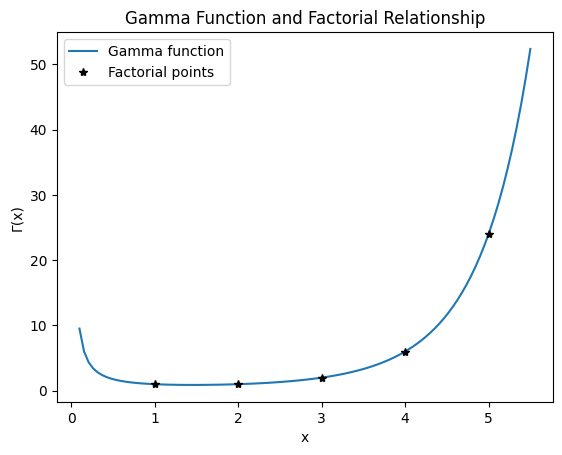

In [11]:
%matplotlib inline

import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

x = np.linspace(0.1, 5.5, 100)
plt.plot(x,sp.gamma(x)) #Gamma函数
k = np.arange(1,6)
plt.plot(k, sp.factorial(k-1), 'k*') #阶乘
plt.title('Gamma Function and Factorial Relationship')
plt.xlabel('x')
plt.ylabel('Γ(x)')
plt.legend(['Gamma function', 'Factorial points'])

### $\beta$函数

$$
B(x,y) = \int_0^{t} t^{x-1}(1-t)^{y-1}dt,\  (x>0, y>0)
$$

$$
B(x,y) = \frac{\Gamma (x) \Gamma (y)} {\Gamma (x+y) }
$$

$$
B(x,y) = B(y,x)
$$

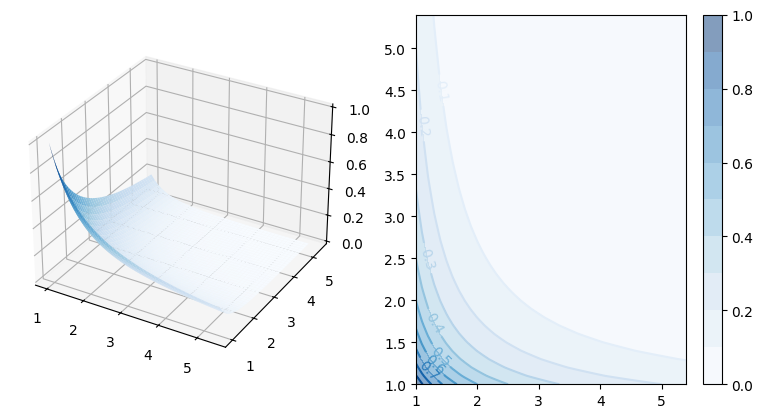

In [12]:
x, y = np.mgrid[1:5.5:.1, 1:5.5:.1]
#pos = np.dstack((x, y))
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
cmapV='Blues'

ax.plot_surface(x,y,sp.beta(x,y),cmap=cmapV)
ax2 = fig.add_subplot(1, 2, 2)
pos2=ax2.contourf(x, y, sp.beta(x,y),10,cmap=cmapV,alpha=0.5)
cset=ax2.contour(x, y, sp.beta(x,y),10,cmap=cmapV)
ax2.clabel(cset, inline=1, fontsize=10)
fig.colorbar(pos2)

## 四大抽样分布定理

### （一） 

​	设$X_1,X_2,\ldots,X_n$是来自正态分布总体$N(\mu,\sigma^2)$的简单随机样本，$\bar X$是样本均值，$S^2$​是样本方差，则

$\bar X \sim N(0,\frac{\sigma^2}{n})$, $\frac{\bar X - \mu}{\sqrt{\frac{\sigma^2}{n}}} \sim N(0,1)$

1. $\frac{(n-1)S^2}{\sigma^2}\sim\chi^2(n-1)$

2. $\bar X$与$S^2$​相互独立  

3. $\frac{\bar X-\mu}{S/\sqrt{n}}\sim t(n-1)$

![](https://philfan-pic.oss-cn-beijing.aliyuncs.com/img/20250225205205727.png)

![](https://philfan-pic.oss-cn-beijing.aliyuncs.com/img/20250225205216226.png)

- 记住 $E(X),E(X^2),E(S^2),Var(S^2)$的计算方式

![](https://philfan-pic.oss-cn-beijing.aliyuncs.com/img/20250225204215096.png)

### （二）

​设$X_1,X_2,\ldots,X_{n1}$是来自正态分布总体$N_1(\mu_1,\sigma^2_1)$的简单随机样本,$Y_1,Y_2,\ldots,Y_{n2}$是来自正态分布总体$N_2(\mu_2,\sigma^2_2)$的简单随机样本,样本相互独立$\bar X,\bar Y$是样本均值，$S_1^2,S_2^2$​是样本方差，则

 1. $\frac{S^2_1/\sigma^2_1}{S_2^2/\sigma^2_2}\sim F(n1,n2)$

 2. 若$\sigma_1^2=\sigma_2^2=\sigma^2$,
 
    $$
    \frac{(\bar X-\bar Y)-(\mu_1-\mu_2) }{S_w\sqrt{\frac{1}{n_1}+\frac{1}{n_2}}}
    $$
    
    其中	
    
    $$
    S^2_w=\frac{(n_1-1)S^2_1+(n_2-1)S_2^2}{n_1+n_2-2}
    $$
    